In [1]:
from imports import *
from statsmodels.distributions.empirical_distribution import ECDF

%load_ext autoreload
%autoreload 2

In [2]:
campaigns = preprocessing.load_campaign()
users = preprocessing.load_user_data()

In [3]:
pure_campaigns = {k:v for k,v in campaigns.items() if k not in preprocessing.bandwagon_hashtags}

# Summary Table

In [7]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results_n_users.pkl'), 'rb') as f:
    user_exposures = pickle.load(f)

    
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    tweet_exposures = pickle.load(f)


In [8]:
user_exposures['jharkhandwithmodi']

{'kishort91114382': (0, 0, datetime.datetime(2019, 10, 24, 15, 44, 42)),
 'himanshukeshr20': (1, 81, datetime.datetime(2019, 10, 17, 7, 17, 29)),
 'zoomharish15': (0, 1, datetime.datetime(2019, 10, 9, 12, 20, 8)),
 'style_icon133': (0, 0, datetime.datetime(2019, 10, 9, 11, 41, 20)),
 'rahuldubeyjh': (0, 0, datetime.datetime(2019, 5, 15, 7, 19)),
 'bkchouhan8': (0, 0, datetime.datetime(2019, 2, 18, 6, 18, 27)),
 'mantubiri': (0, 0, datetime.datetime(2019, 10, 5, 17, 25, 26)),
 'auto_motive_1': (0, 1, datetime.datetime(2019, 9, 26, 6, 38, 27)),
 'nishikantchouh1': (0, 68, datetime.datetime(2019, 9, 26, 16, 23, 59)),
 'kishormdp12': (0, 0, datetime.datetime(2019, 10, 12, 13, 45, 43)),
 'shiveshverma10': (0, 0, datetime.datetime(2019, 5, 16, 4, 51, 4)),
 'sriramsinghcha2': (1, 100, datetime.datetime(2019, 10, 12, 8, 34, 59)),
 'sk0surajritesh': (0, 0, datetime.datetime(2019, 10, 12, 8, 29, 28)),
 'nitishk53308363': (0, 0, datetime.datetime(2019, 10, 12, 8, 16, 24)),
 'nishikant_dubey': (0,

In [4]:
# load tweets labeled with exposures 
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results_n_users.pkl'), 'rb') as f:
#with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)
    
dfs = []
for hashtag, tweets in tqdm(campaigns.items()):
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        _, df = trending.build_df(hashtag, tweets, exposures,
                                  raw_df_too=True, include_missing=False)
        dfs.append(df)
big_df = pd.concat(dfs)

In [64]:
big_df

,username,id,retweet_from,template,retweet_id,text,date,retweets,favorites,adj_date,type,follower_data,template_exposure,normal_exposure,total_exposure,time,trending_start,inferred_trending_start,hashtag
adj_date,,,,,,,,,,,,,,,,,,,
2019-09-12 11:57:01,bjp4latehar,1172033856607682560,,,,आधारभूत संरचना हो या शिक्षा या फिर स्वच्छता या...,2019-09-12 06:27:01,0,0,2019-09-12 11:57:01,regular,True,151,64,215,2019-09-12 11:57:01,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-09-12 16:52:28,vjay21788,1172108207499558912,ommathur_bjp,,1172063209785741312,rt @ommathur_bjp: #bharatmatakijai भारत माता क...,2019-09-12 11:22:28,140,0,2019-09-12 16:52:28,regular_retweet,True,146,271,417,2019-09-12 16:52:28,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-02-17 15:16:25,vagrawa3,1097069751128358914,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,2019-02-17 09:46:25,0,0,2019-02-17 15:16:25,template,True,5,10,15,2019-02-17 15:16:25,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-09-12 15:17:32,ashishmerkhed,1172084320225263619,bjp4india,,1172082904316334080,rt @bjp4india: चुनाव के समय मैंने आपसे कामदार ...,2019-09-12 09:47:32,456,0,2019-09-12 15:17:32,regular_retweet,True,59,60,119,2019-09-12 15:17:32,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-02-17 18:01:30,manishkbjp,1097111295562678276,bjp4jharkhand,2014 तक हायर सेकेंडरी स्कूलों की संख्या 653 थी...,1097067864467550208,rt @bjp4jharkhand: 2014 तक हायर सेकेंडरी स्कूल...,2019-02-17 12:31:30,6,14,2019-02-17 18:01:30,template_retweet,True,218,53,271,2019-02-17 18:01:30,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-21 21:22:11,encapsulatdsoul,1054037640884842496,amitmalviya,,1051805135549227008,rt @amitmalviya: rahul gandhi busts his own li...,2018-10-21 15:52:11,3152,0,2018-10-21 21:22:11,regular_retweet,True,0,159,159,2018-10-21 21:22:11,2018-10-11 23:30:00,2018-10-11 23:30:00,gappupappu
2018-10-12 17:34:51,vsonam9,1050718938986774529,bjp4india,,1050333480062578688,rt @bjp4india: जिनका पूरा परिवार ही भ्रष्ट है ...,2018-10-12 12:04:51,559,0,2018-10-12 17:34:51,regular_retweet,True,5,186,191,2018-10-12 17:34:51,2018-10-11 23:30:00,2018-10-11 23:30:00,gappupappu
2018-10-11 16:32:52,newsanti,1050340952005578752,modibharosa,,1050338334919278592,rt @modibharosa: #gappupappu कांग्रेसियों का ए...,2018-10-11 11:02:52,22,25,2018-10-11 16:32:52,regular_retweet,True,2,60,62,2018-10-11 16:32:52,2018-10-11 23:30:00,2018-10-11 23:30:00,gappupappu


# Summary Table

In [237]:
tmap = {'template_retweet': 'RT', 'regular_retweet': 'RT',
       'template': 'Tweet', 'regular': 'Tweet'}

big_df['Tweet Type'] = big_df['type'].apply(tmap.get)
big_df['User Category'] = big_df.typeuser.apply(lambda x: x[2:].capitalize())

big_df.tweet_type.unique()

array(['tweet', 'RT'], dtype=object)

In [238]:
interest_cols = ['total_exposure', 'favorites', 'retweets']

In [239]:
type_map = {k: int for k in interest_cols}

In [177]:
from tableone import TableOne

In [240]:
r = TableOne(data=big_df.fillna(0).astype(type_map), columns=interest_cols, nonnormal=interest_cols,
             categorical=[], groupby=['Tweet Type', 'User Category'])

In [243]:
with open(os.path.join(ASSETS_DIR, 'data_summary.tex'), 'w') as f:
    print(r.tableone.T.to_latex(), file=f)

# Virality by User Type

In [6]:
is_template = lambda x: not x.root.template == ''
template_cascades = preprocessing.process_campaign(pure_campaigns,
                                                   filter_func=is_template)

is_not_template = lambda x: x.root.template == ''
not_template_cascades = preprocessing.process_campaign(pure_campaigns,
                                                       filter_func=is_not_template)

100%|██████████| 68/68 [00:10<00:00,  6.24it/s]


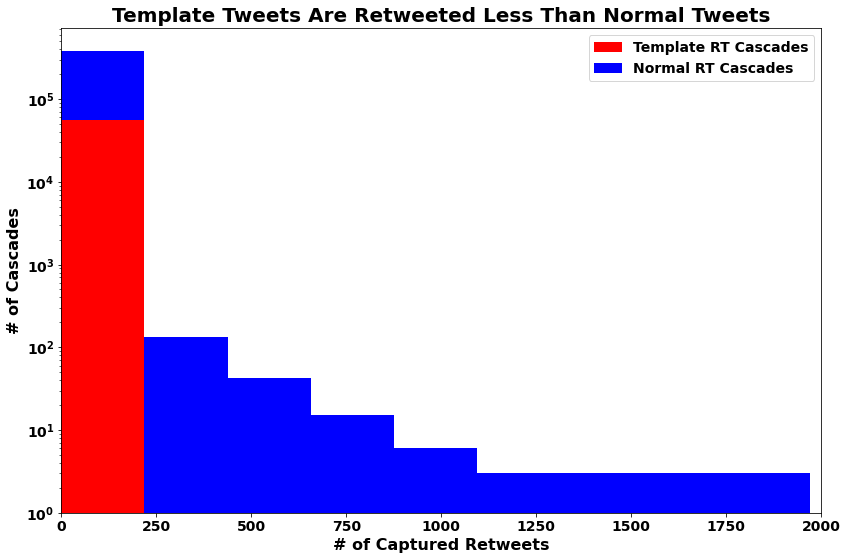

In [167]:
temp = [x.n_retweets for x in template_cascades]
no_temp = [x.n_retweets for x in not_template_cascades]

plt.hist([temp, no_temp], bins=60, stacked=True, density=False, log=False, 
         label=['Template RT Cascades', 'Normal RT Cascades'],
        color=['red', 'blue'])
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('# of Captured Retweets')
plt.ylabel('# of Cascades')
plt.title('Template Tweets Are Retweeted Less Than Normal Tweets')
plt.xlim([0,2000])
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'cascade_size_by_tweet_type_hist.png'))

In [61]:
def summarize_top_tweets(top_tweets, rt_thresh=0):
    # input: [(Tweet, (implied) RT count)]
    # output: info about these tweets
    labels = []#[get_user_type(tweet.username) for tweet, rt_count in top_tweets]
    rt_counts = []#[rt_count for tweet, rt_count in top_tweets]
    
    label_dict = {}
    for tweet, rt_count in top_tweets:
        if rt_count > rt_thresh:
            user_type = users.type.get(tweet.username, 'Unknown')
            labels.append(user_type)
            rt_counts.append(rt_count)
            temp = label_dict.get(user_type, [])
            temp.append(rt_count)
            label_dict[user_type] = temp
    
    return label_dict

def extract_tweets(cascade, result_list, min_size=50, rt_thresh=5, template=False):
    ''' Helper function takes a cascade and builds 
    a global list top_tweets with tweets that satisfy the various criteria
    min_size: the # of tweets in a cascade to be considered
    rt_thresh: how many rts a tweet has to have to be added
    template: boolean for whether the root must be a template
    '''
    if template and cascade.root.template == '':
        return
    if cascade.n_retweets > min_size:
        g = cascade.create_network(kind='temporal')
        locs = np.where(g.get_out_degrees(g.get_vertices()) > rt_thresh)
        temp_list = [(g.vp.vertex_to_tweet[v], g.vertex(v).out_degree()) for v in locs[0]]
        result_list += temp_list
        
non_template_rts = []
for tag, tweets in pure_campaigns.items():
        preprocessing.parse_cascades_low_mem(*preprocessing.process_tweet_ts(tweets.values()), 
                               cascade_func=lambda x: extract_tweets(x, non_template_rts, min_size=0, 
                                                                     rt_thresh=0, template=False))

100%|██████████| 2994/2994 [00:00<00:00, 8107.78it/s]


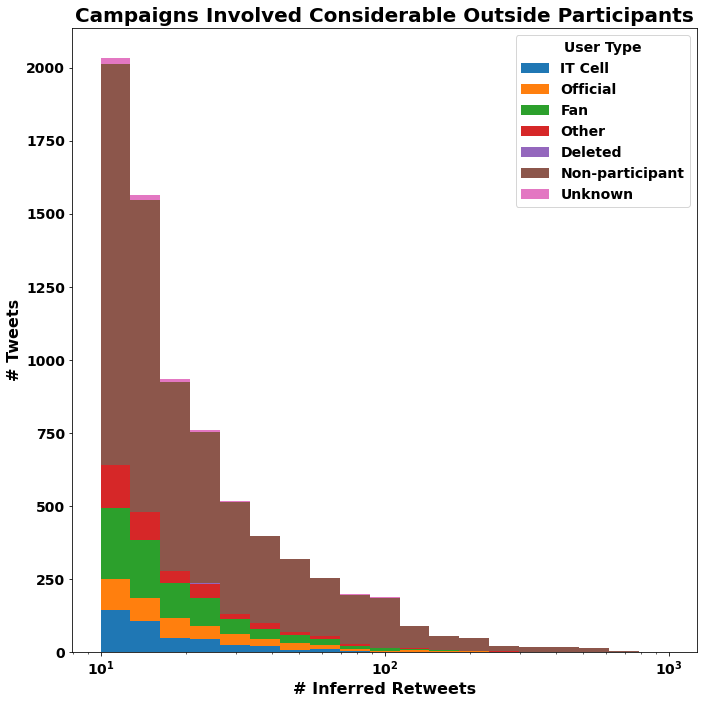

In [78]:
key_map = {'1_itcell': 'IT Cell', '2_official': 'Official', '3_fan': 'Fan',
          '4_other': 'Other', '5_deleted': 'Deleted', '6_non-participant': 'Non-participant'}

label_dict = summarize_top_tweets(non_template_rts)#trweets)
keys, values = list(label_dict.keys()), list(label_dict.values())
sorted_keys, sorted_values = zip(*sorted(zip(keys, values), key=lambda x: x[0]))
sorted_keys = [key_map.get(key, 'Unknown') for key in sorted_keys]
plt.figure(figsize=(10,10))
logbins = np.geomspace(10, 1000, 20)
plt.hist(sorted_values, stacked=True, label=sorted_keys, bins=logbins)#, density=True)
plt.legend(title='User Type')
plt.xscale('log')
plt.xlabel('# Inferred Retweets')
plt.ylabel('# Tweets')
plt.title('Campaigns Involved Considerable Outside Participants')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'normal_tweet_popularity_by_user_type.png'))

In [74]:
template_rts = []
for tag, tweets in pure_campaigns.items():
        preprocessing.parse_cascades_low_mem(*preprocessing.process_tweet_ts(tweets.values()), 
                               cascade_func=lambda x: extract_tweets(x, template_rts, min_size=0, 
                                                                     rt_thresh=0, template=True))

100%|██████████| 2994/2994 [00:00<00:00, 261592.46it/s]


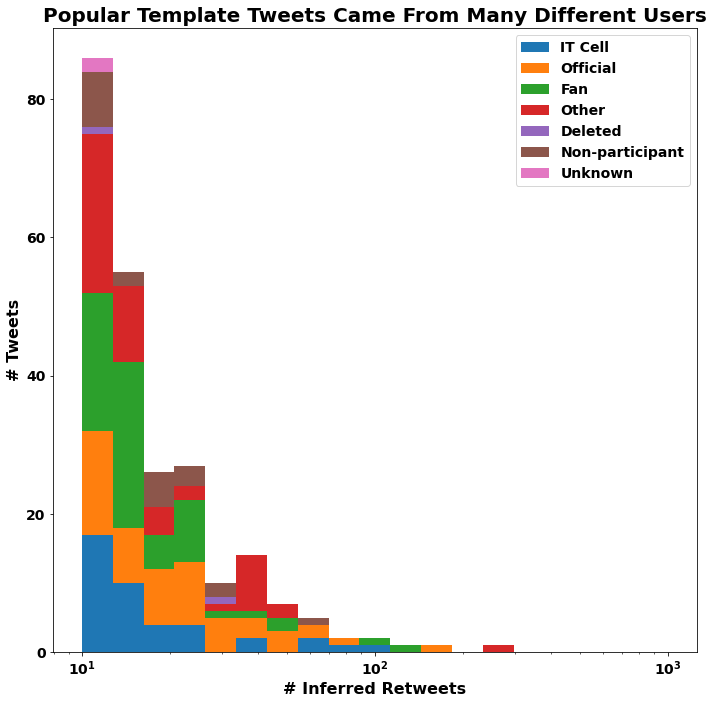

In [79]:
key_map = {'1_itcell': 'IT Cell', '2_official': 'Official', '3_fan': 'Fan',
          '4_other': 'Other', '5_deleted': 'Deleted', '6_non-participant': 'Non-participant'}

label_dict = summarize_top_tweets(template_rts)
keys, values = list(label_dict.keys()), list(label_dict.values())
sorted_keys, sorted_values = zip(*sorted(zip(keys, values), key=lambda x: x[0]))
sorted_keys = [key_map.get(key, 'Unknown') for key in sorted_keys]
plt.figure(figsize=(10,10))
logbins = np.geomspace(10, 1000, 20)
plt.hist(sorted_values, stacked=True, label=sorted_keys, bins=logbins)#, density=True)
plt.legend()
plt.xscale('log')
plt.xlabel('# Inferred Retweets')
plt.ylabel('# Tweets')
plt.title('Popular Template Tweets Came From Many Different Users')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_DIR, 'template_tweet_popularity_by_user_type.png'))


# Exposure Curves

In [5]:
types = ['regular', 'regular_retweet', 'template', 'template_retweet']
styles = ['b', 'b--', 'r', 'r--']
labels = ["Regular Tweet", "Regular RT", "Template Tweet", "Template RT"]

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


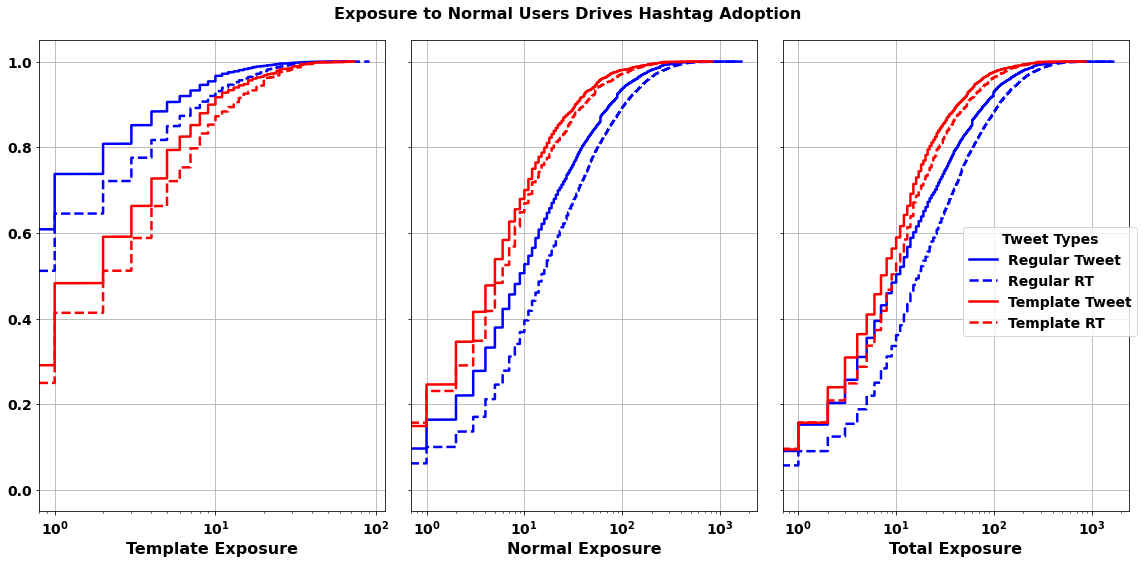

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16,8), sharey=True)
exposure_types = ['template_exposure', 'normal_exposure', 'total_exposure']
flag = 0 # for omitting labels 
for ax, exposure_type in zip(axs, exposure_types):
    for t, sty, lab in zip(types, styles, labels):
        if flag: 
            lab = ''
        ecdf = ECDF(big_df.query(f'type == "{t}"')[exposure_type])
        ax.plot(ecdf.x, ecdf.y, sty, label=lab)
    ax.set_xlabel(' '.join([x.capitalize() for x in exposure_type.split('_')]))
    ax.set_xscale('log')
    ax.grid(True)
    flag = 1 
fig.legend(title='Tweet Types', loc='center right')
#fig.suptitle('Campaign Hashtag Adoption by Exposure')
fig.suptitle('Exposure to Normal Users Drives Hashtag Adoption')
fig.tight_layout()
fig.savefig(os.path.join(ASSETS_DIR, 'exposure_curves_users.png'))

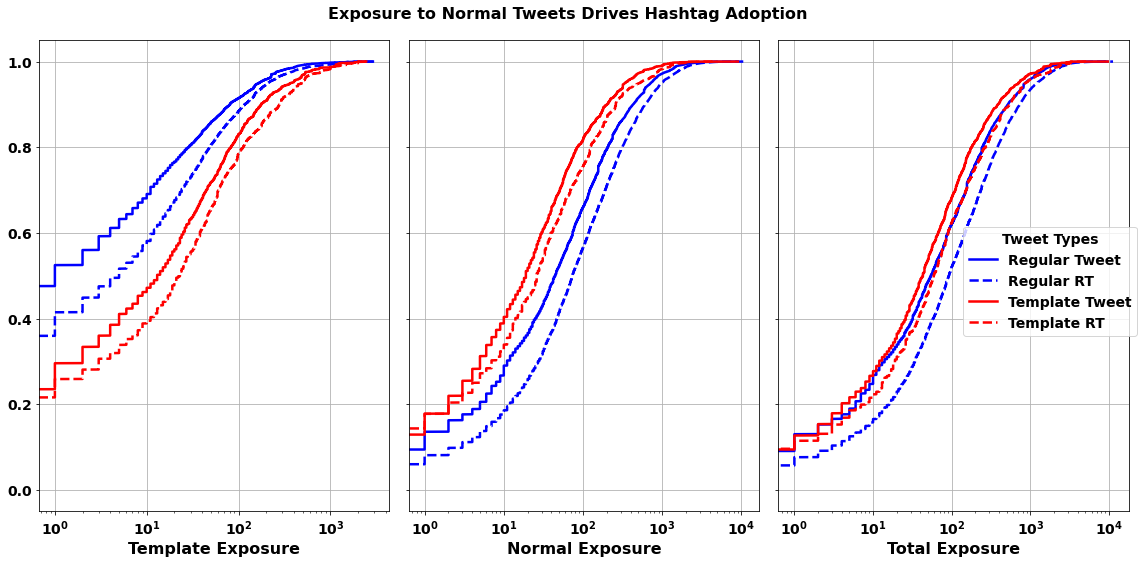

In [165]:
fig, axs = plt.subplots(1, 3, figsize=(16,8), sharey=True)
exposure_types = ['template_exposure', 'normal_exposure', 'total_exposure']
flag = 0 # for omitting labels 
for ax, exposure_type in zip(axs, exposure_types):
    for t, sty, lab in zip(types, styles, labels):
        if flag: 
            lab = ''
        ecdf = ECDF(big_df.query(f'type == "{t}"')[exposure_type])
        ax.plot(ecdf.x, ecdf.y, sty, label=lab)
    ax.set_xlabel(' '.join([x.capitalize() for x in exposure_type.split('_')]))
    ax.set_xscale('log')
    ax.grid(True)
    flag = 1 
fig.legend(title='Tweet Types', loc='center right')
#fig.suptitle('Campaign Hashtag Adoption by Exposure')
fig.suptitle('Exposure to Normal Tweets Drives Hashtag Adoption')
fig.tight_layout()
fig.savefig(os.path.join(ASSETS_DIR, 'exposure_curves.png'))

[Text(0.5, 0, 'Template Exposure'),
 Text(0, 0.5, 'Normal Exposure'),
 Text(0.5, 1.0, 'Exposure to Template and Normal Tweets is Divergent')]

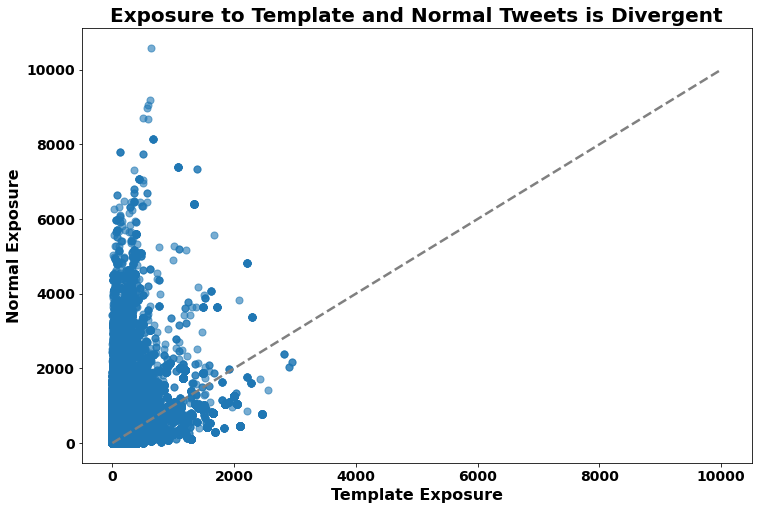

In [152]:
fig, ax = plt.subplots()
ax.scatter(big_df.template_exposure+1, big_df.normal_exposure+1, s=50, alpha=.6)
ax.plot([1,10000],[1,10000], ls='--', color='grey')
ax.set(xlabel='Template Exposure', ylabel='Normal Exposure',
      title='Exposure to Template and Normal Tweets is Divergent')


[None,
 None,
 Text(0.5, 0, 'Template Exposure'),
 Text(0, 0.5, 'Normal Exposure'),
 Text(0.5, 1.0, 'Exposure to Template and Normal Tweets is Divergent')]

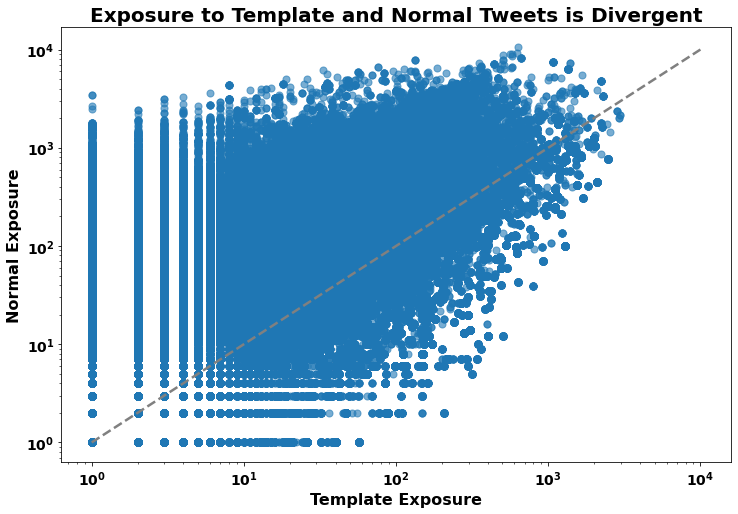

In [151]:
fig, ax = plt.subplots()
ax.scatter(big_df.template_exposure+1, big_df.normal_exposure+1, s=50, alpha=.6)
ax.plot([1,10000],[1,10000], ls='--', color='grey')
ax.set(xscale='log', yscale='log', xlabel='Template Exposure', ylabel='Normal Exposure',
      title='Exposure to Template and Normal Tweets is Divergent')


# Sentence Transformer Neighborhoods

### 5% Neighborhood

In [9]:
with open(os.path.join(TWITTER_DATA_DIR, 'neighbors_results.pkl'), 'rb') as f:
    result_dict = pickle.load(f)
    
with open(os.path.join(TWITTER_DATA_DIR, 'neighbors_results_2.pkl'), 'rb') as f:
    result_dict.update(pickle.load(f))

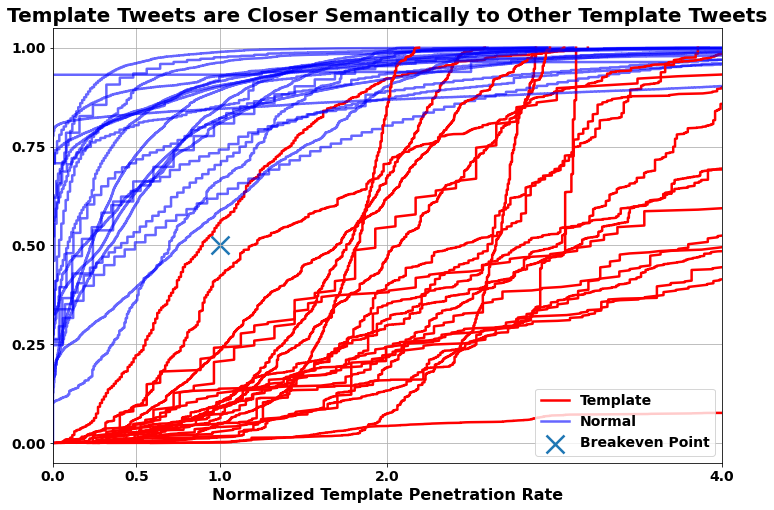

In [10]:
flag = 0
for ht, res in result_dict.items():
    if res['len_unique_tweets'] > 5000:       
        N_NEIGHBORS = res['n_neighbors']
        templates = res['template_n_template_neighbors']
        normals = res['normal_n_template_neighbors']
        global_pct_temp = res['global_pct_temp']

        temp_pcts = np.array(templates)/N_NEIGHBORS
        norm_pcts = np.array(normals)/N_NEIGHBORS
        temp_pcts /= global_pct_temp
        norm_pcts /= global_pct_temp
        ecdf_temp = ECDF(temp_pcts)
        ecdf_norm = ECDF(norm_pcts)
        if flag:
            label_1, label_2 = '', ''
        else:
            label_1, label_2 = 'Template', 'Normal'
        plt.plot(ecdf_temp.x, ecdf_temp.y, label=label_1, color='r')
        plt.plot(ecdf_norm.x, ecdf_norm.y, label=label_2, color='b', alpha=.6)
        flag = 1
        
plt.title('Template Tweets are Closer Semantically to Other Template Tweets')
plt.xlabel('Normalized Template Penetration Rate')
plt.scatter([1], [.5], marker='x', label='Breakeven Point')

plt.legend()
plt.yticks([0, .25, .5, .75, 1])
plt.xticks([0,  .5, 1, 2, 4])
plt.xlim(0, 4)

plt.grid()
plt.savefig(os.path.join(ASSETS_DIR, 'template_penetration_cdfs_5percent.png'))

### 1% Neighborhood

In [4]:
with open(os.path.join(TWITTER_DATA_DIR, 'neighbors_results_1percent.pkl'), 'rb') as f:
    result_dict = pickle.load(f)

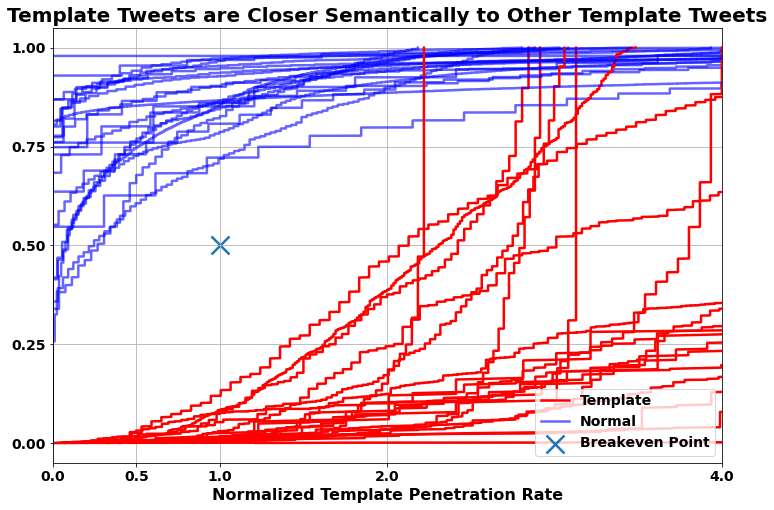

In [8]:
flag = 0
for ht, res in result_dict.items():
    if res['len_unique_tweets'] > 5000:       
        N_NEIGHBORS = res['n_neighbors']
        templates = res['template_n_template_neighbors']
        normals = res['normal_n_template_neighbors']
        global_pct_temp = res['global_pct_temp']

        temp_pcts = np.array(templates)/N_NEIGHBORS
        norm_pcts = np.array(normals)/N_NEIGHBORS
        temp_pcts /= global_pct_temp
        norm_pcts /= global_pct_temp
        ecdf_temp = ECDF(temp_pcts)
        ecdf_norm = ECDF(norm_pcts)
        if flag:
            label_1, label_2 = '', ''
        else:
            label_1, label_2 = 'Template', 'Normal'
        plt.plot(ecdf_temp.x, ecdf_temp.y, label=label_1, color='r')
        plt.plot(ecdf_norm.x, ecdf_norm.y, label=label_2, color='b', alpha=.6)
        flag = 1
        
plt.title('Template Tweets are Closer Semantically to Other Template Tweets')
plt.xlabel('Normalized Template Penetration Rate')
plt.scatter([1], [.5], marker='x', label='Breakeven Point')

plt.legend()
plt.yticks([0, .25, .5, .75, 1])
plt.xticks([0,  .5, 1, 2, 4])
plt.xlim(0, 4)

plt.grid()
plt.savefig(os.path.join(ASSETS_DIR, 'template_penetration_cdfs_1percent.png'))